# Data Science 101 Homework 1 (2019년 2학기)
## 2016118274 홍현욱

## Upload Data File

In [3]:
from google.colab import files
uploaded = files.upload()

Saving wine.data to wine.data


## 1. Read Data File into Pandas DataFrame

In [4]:
#Pandas 이용하여 데이터 읽어 DataFrame에 저장하고, 각 속성 이름 적용(Short Name 사용)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')
from pandas.plotting import scatter_matrix

#wine.names는 wine.data에 대한 부가적 설명
#Parsing
wine_data = uploaded['wine.data'].decode("utf-8").split("\n")
del wine_data[-1] #\n으로 짤린 마지막 열은 빈열이므로 삭제함
wine = list() #empty list 생성
for line in wine_data:
  wine.append(line.split(',')) 
  
  
#column 추가 및 데이터프레임화
col_names =['Grade','Alcohol','MalicAcid','Ash','AlcalinityOfAsh','Magnesium','TotalPhenols','Flavanoids','NonflavanoidPhenols','Proanthocyanis','ColorIntensity','Hue','OD280/315ofDiluted','Proline']
df_wine = pd.DataFrame(wine,columns = col_names)
df_wine = df_wine.apply(pd.to_numeric) #정수->소수점으로 처리 4 ->4.00


#일부 출력
df_wine.head()
df_wine.tail(5)



,Grade,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanis,ColorIntensity,Hue,OD280/315ofDiluted,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


## 2. Show Data Representation Values

In [13]:
#각 속성에 대한 대푯값 출력(평균, 분산(표준편차), 최소, 최대, Q1, Q2, Q3)

#소숫점 2째자리까지만 표시
pd.options.display.float_format = '{:.2f}'.format 
#df_wine.astype(float).describe()
#대표값 출력
#print(df_wine.mean())
df_wine.describe()


,Grade,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanis,ColorIntensity,Hue,OD280/315ofDiluted,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


## 3. Data Visualization

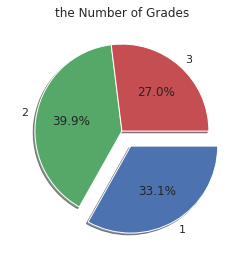

In [24]:
# 원형차트 (클래스 정보)

#grade의 속성별 갯수
temp = pd.value_counts(df_wine['Grade'].values, sort=False)
sizes  = list()
sizes.extend(temp)

#원형차트 속성
labels = ['1','2','3']
explode = (0.2,0,0)
plt.title('the Number of Grades')
plt.pie(sizes,colors=['b','g','r'],labels = labels,explode = explode, autopct = '%1.1f%%',counterclock=False, shadow = True)
plt.show()



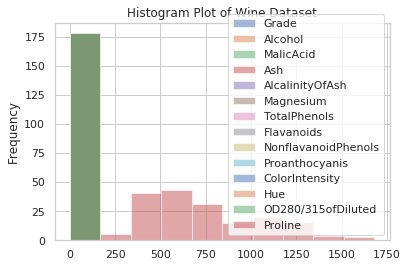

In [7]:
# 히스토그램 (속성 자유 선택)
df_wine.plot.hist(alpha=0.5)
plt.title('Histogram Plot of Wine Dataset')
plt.show()

Box Plot of Wine Dataset


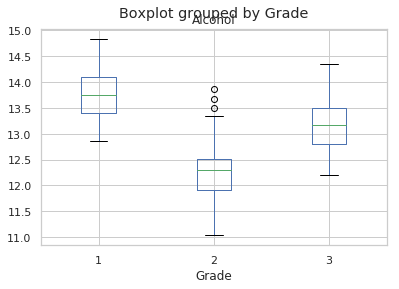

In [10]:
# 상자 그림 (속성 자유 선택)
print('Box Plot of Wine Dataset')
df_wine.boxplot(column=['Alcohol'],by='Grade')
#df_wine.plot.box(by='Grade', figsize=(15,15), grid=False)
plt.show()

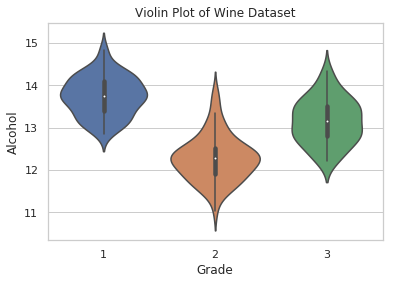

In [9]:
# 바이올린 플롯 (속성 자유 선택)
sns.violinplot(data=df_wine,x='Grade',y='Alcohol')
plt.title('Violin Plot of Wine Dataset')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


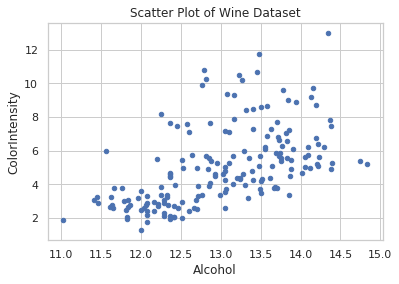

In [11]:
# 산점도 (속성 자유 선택)
df_wine.plot.scatter(x='Alcohol',y='ColorIntensity')
plt.title('Scatter Plot of Wine Dataset')
plt.show()

Scatter Plot Matrix of Wine Dataset


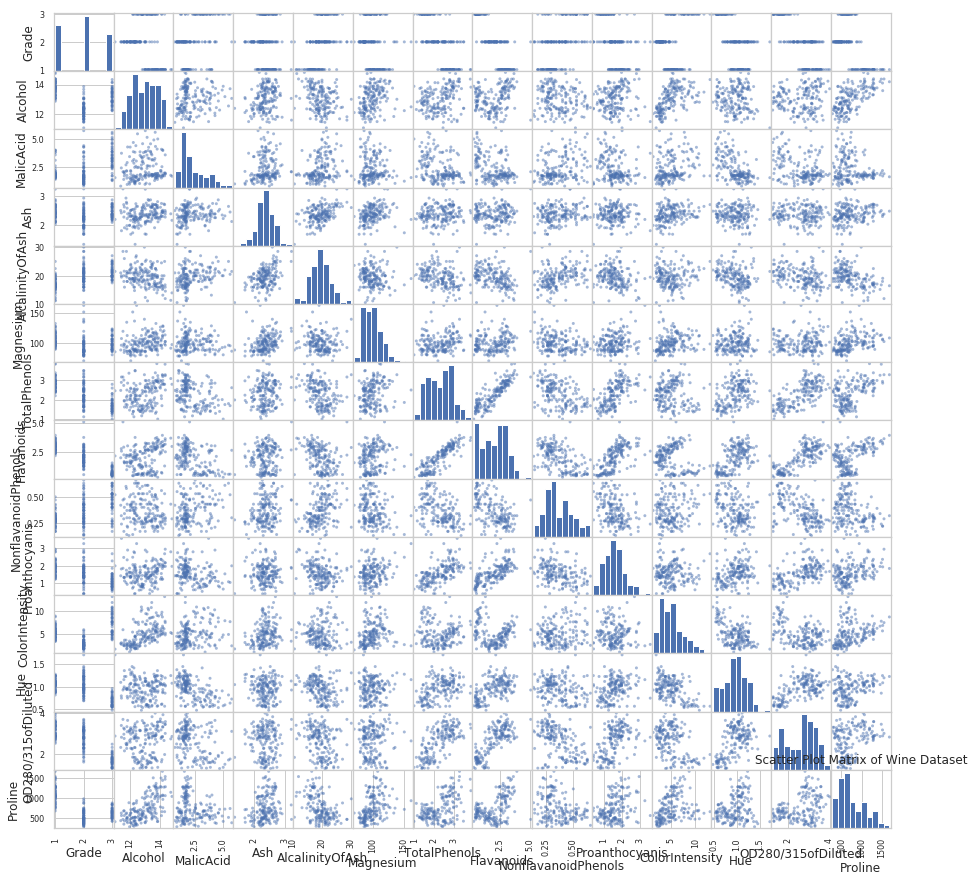

In [12]:
# 산점도행렬 (전체 속성 또는 속성 3개 이상 자유 선택)
print('Scatter Plot Matrix of Wine Dataset')
scatter_matrix(df_wine, figsize=(15,15))
plt.title('Scatter Plot Matrix of Wine Dataset')
plt.show()